# Data Visualization

## 📚 Table of Contents

* Imports
* Quick Dataset Setup
* Plot Selection Guide
* Basic Plots- Histogram, Line Plot, Boxplot,Countplot
* Relationship Plots- Scatter Plot, Violin Plot ,Boxplot (Category vs Numeric)
* Multivariate Plots-Correlation Heatmap, Pairplot
* Helpful Add-ons
* Quick Patterns to Look For
* Fast Cleanup Snippets
* Best Practice Workflow

## 📩Import the dependancies

In [3]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

sns.set(style="whitegrid",palette="Set2")

## 📁Understanding data

In [5]:
df=pd.read_csv("data/obesity_dataset.csv")

In [6]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [8]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### ✂️Before visualization,let's do some data cleaning:

Renamed confusing, or inconsistent column names to short, readable, and consistent names.

In [9]:
df.rename(columns={
    'Gender': 'gender',
    'Age': 'age',
    'Height': 'height',
    'Weight': 'weight',
    'family_history_with_overweight':'family_history',
    'FAVC':'high_caloric_food',
    'FCVC':'veggies_freq',
    'NCP':'main_meals_freq',
    'CAEC':'eat_between_meals',
    'SMOKE':'smoke',
    'CH2O':'water_l_per_day',
    'SCC':'monitor_calories',
    'FAF':'physical_activity_freq',
    'TUE':'screen_time_hr',
    'CALC':'alcohol_freq',
    'MTRANS':'transport_mode',
    'NObeyesdad':'obesity_level'
}, inplace=True)
df.head()

,gender,age,height,weight,family_history,high_caloric_food,veggies_freq,main_meals_freq,eat_between_meals,smoke,water_l_per_day,monitor_calories,physical_activity_freq,screen_time_hr,alcohol_freq,transport_mode,obesity_level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Next,convert all categorical/binary column values to lowercase

In [10]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower()

df.head()

,gender,age,height,weight,family_history,high_caloric_food,veggies_freq,main_meals_freq,eat_between_meals,smoke,water_l_per_day,monitor_calories,physical_activity_freq,screen_time_hr,alcohol_freq,transport_mode,obesity_level
0,female,21.0,1.62,64.0,yes,no,2.0,3.0,sometimes,no,2.0,no,0.0,1.0,no,public_transportation,normal_weight
1,female,21.0,1.52,56.0,yes,no,3.0,3.0,sometimes,yes,3.0,yes,3.0,0.0,sometimes,public_transportation,normal_weight
2,male,23.0,1.80,77.0,yes,no,2.0,3.0,sometimes,no,2.0,no,2.0,1.0,frequently,public_transportation,normal_weight
3,male,27.0,1.80,87.0,no,no,3.0,3.0,sometimes,no,2.0,no,2.0,0.0,frequently,walking,overweight_level_i
4,male,22.0,1.78,89.8,no,no,2.0,1.0,sometimes,no,2.0,no,0.0,0.0,sometimes,public_transportation,overweight_level_ii


## 🎯Plot Selection Guide

| Goal                        | Best Plot               |
|-----------------------------|--------------------------|
| Distribution                | Histogram / KDE         |
| Outliers                    | Boxplot                 |
| Category counts             | Countplot               |
| Numeric vs Numeric          | Scatter                 |
| Category vs Numeric         | Box / Violin            |
| Correlation                 | Heatmap                 |
| Multi-variable relationships| Pairplot                |

# 📊Now let's do Data Visualization

## 1. Univariate Analysis (Single Column)

### A. Histogram (Numeric Column)

#### ❓When to use:
* To see the distribution (skewed, uniform, multi-modal)
* To detect outliers and clusters

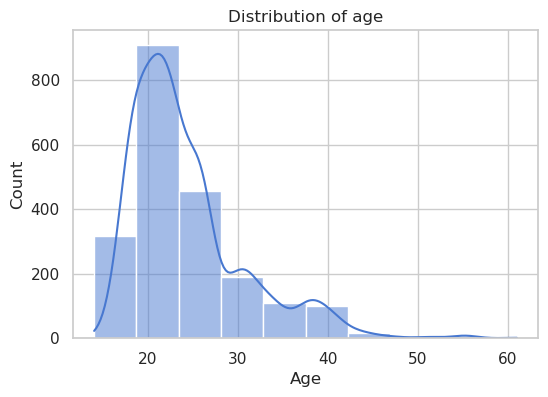

In [6]:
plt.figure(figsize=(6,4))

sns.histplot(df['age'],bins=10,kde=True)
plt.title("Distribution of age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


### B. Boxplot (Numeric Column)

#### ❓When to use:
To see median, quartiles, and outliers

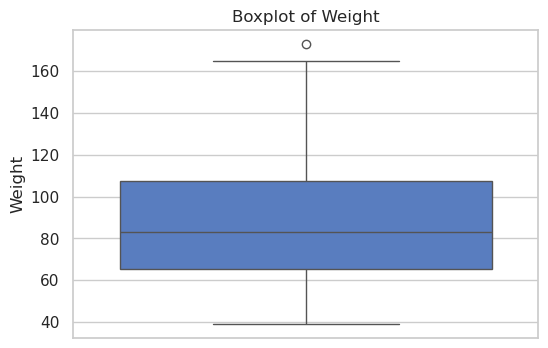

In [7]:
plt.figure(figsize=(6,4))

sns.boxplot(y=df['weight'])
plt.title('Boxplot of Weight')
plt.ylabel('Weight')
plt.show()

#### Customization:

* Horizontal boxplot: x=df['age']
* Add palette: eg, palette='Set2'

### C. Countplot (Categorical Column)

#### ❓When to use:
* You can check the counts or frequency between classes/target variable/outcome.
* You can identify imbalanced datasets.

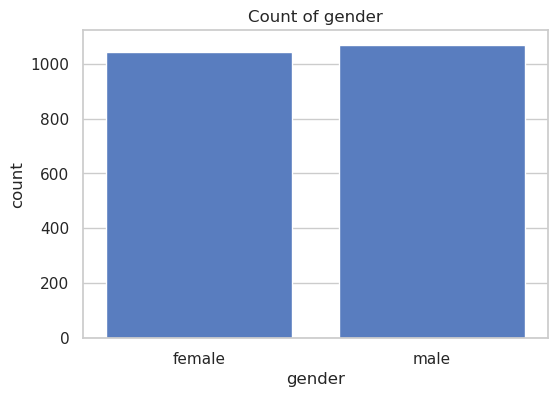

In [8]:
plt.figure(figsize=(6,4))

sns.countplot(x='gender',data=df)
plt.title('Count of gender')
plt.show()

#### Customization:
* Add hue: hue='obesity_level' to see obesity levels by gender
* Rotate labels: plt.xticks(rotation=45)

## Bivariate Analysis (Two Variables)

### A. Scatter Plot

#### ❓When to use:

* Two numeric columns to see relationship or correlation
* Color by category to explore patterns

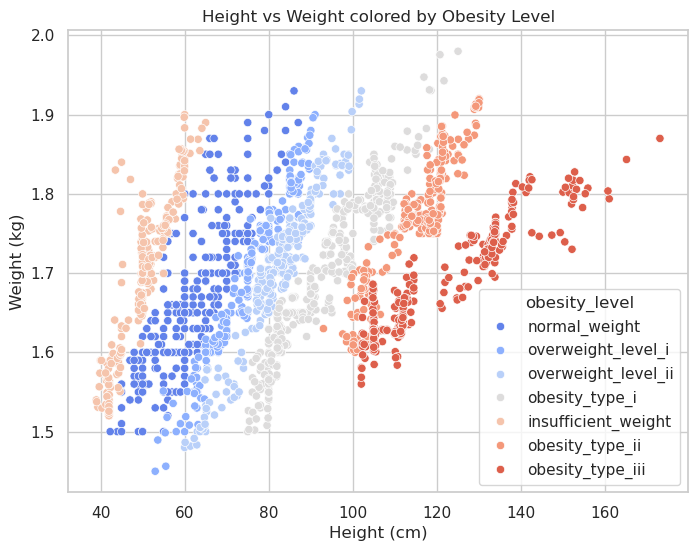

In [9]:
plt.figure(figsize=(8,6))

sns.scatterplot(x='weight',y='height',hue='obesity_level',data=df,palette='coolwarm')

plt.title('Height vs Weight colored by Obesity Level')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

#### Customization:
* style='gender' → differentiate markers by gender
* s=100 → marker size
* alpha=0.7 → transparency

### B. Boxplot (Numeric vs Categorical)

#### ❓When to use:
* When you want a quick summary of the distribution.
* Compare distributions of a numeric column across categories

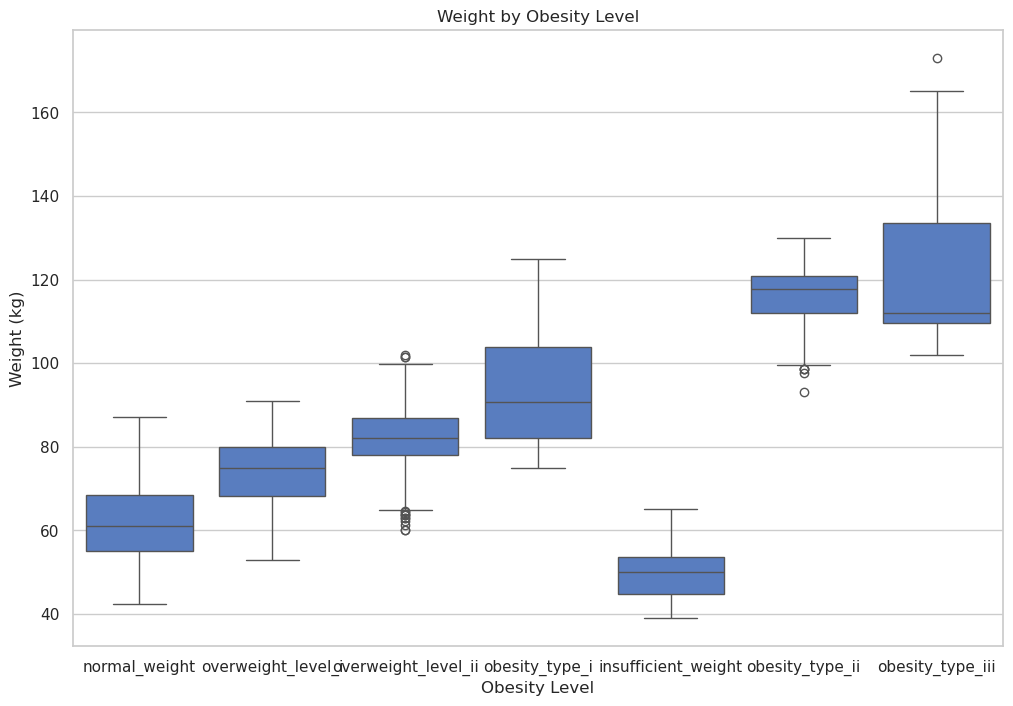

In [10]:
plt.figure(figsize=(12,8))

sns.boxplot(x='obesity_level', y='weight', data=df)\

plt.title('Weight by Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Weight (kg)')
plt.show()


#### Customization:
* Split by gender: hue='gender', split=True
* Change color palette: palette='coolwarm'

### C. Violin Plot (Numeric vs Categorical)

#### ❓When to use:
* Distribution + density estimation, often for comparing groups
* Good for detecting multimodal distributions (multiple peaks).
* Useful when you want a more detailed visual summary than a boxplot.

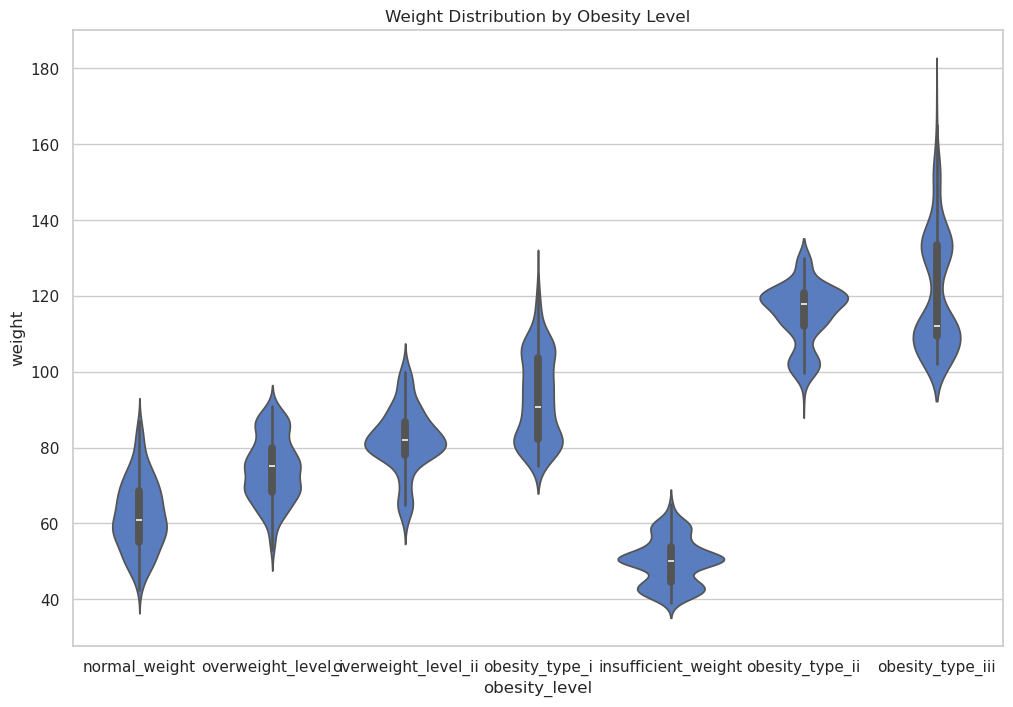

In [11]:
plt.figure(figsize=(12,8))
sns.violinplot(x='obesity_level', y='weight', data=df)

plt.title('Weight Distribution by Obesity Level')
plt.show()

### D. Countplot with Hue (Categorical vs Categorical)

#### ❓When to use:
* When you want to compare categories against another categorical variable.
* To check how categories relate to target variable
* Do NOT use countplot for numeric variables (use histogram instead).

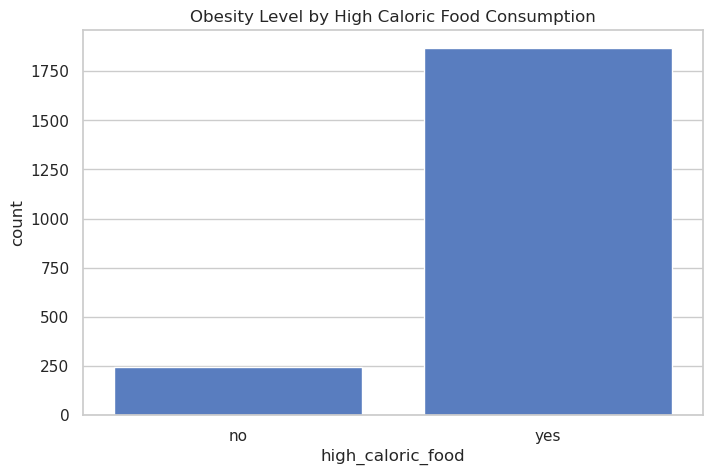

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x='high_caloric_food', data=df)
plt.title('Obesity Level by High Caloric Food Consumption')
plt.show()

## 3. Multivariate / Correlation Analysis 

### A. Correlation Heatmap

#### ❓When to use:
* Find relationships between numeric features
* Check for multicollinearity before modeling

In [13]:
numeric_columns=df.select_dtypes(include=['int64','float64']).columns

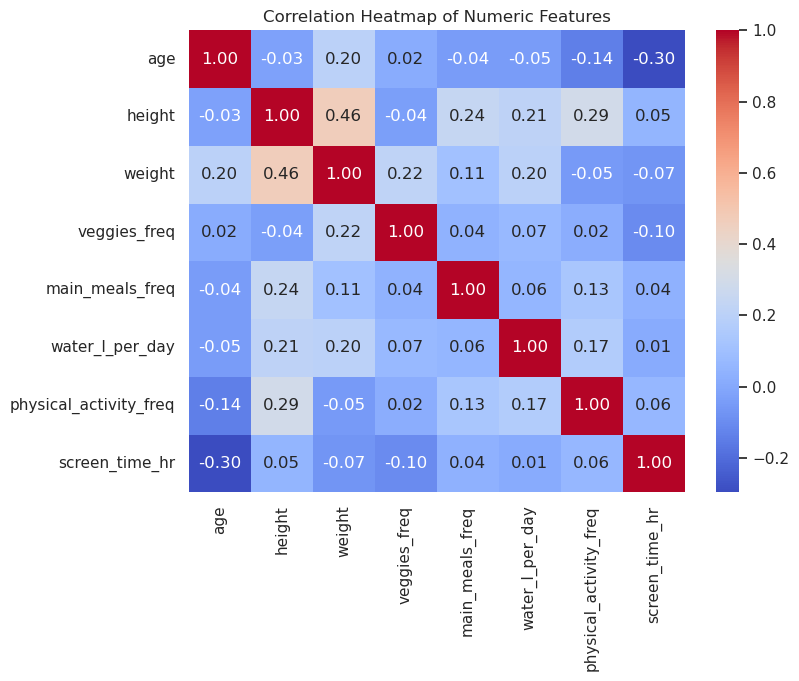

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap of Numeric Features')
plt.show()

#### Customization:
* Change cmap: eg: cmap='viridis'
* Remove annotation: annot=False

### B. Pair plot 

#### ❓When to use it?
* To see pairwise relationships for multiple numeric variables
* Identify clusters or patterns in the data.
* See distribution differences across categories (with hue).

In [15]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

In [ ]:
plt.figure(figsize=(12,8))
sns.pairplot(df[numeric_cols + ['obesity_level']],hue='obesity_level',height=3)

plt.show()

<Figure size 1200x800 with 0 Axes>